# Installing Required Packages:

In [1]:
!pip install pandasql
!pip install geocoder

  Created wheel for pandasql: filename=pandasql-0.7.3-cp36-none-any.whl size=26819 sha256=2425cfcbe3091a28b6382bd1ae6c6df4a55a94bae407cba51b32828bc5735786
  Stored in directory: /root/.cache/pip/wheels/53/6c/18/b87a2e5fa8a82e9c026311de56210b8d1c01846e18a9607fc9
Successfully built pandasql
     |████████████████████████████████| 102kB 2.7MB/s 


In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import gc
import time
import warnings

import geocoder

import time
import pandasql as ps

from PIL import Image
from wordcloud import WordCloud

import plotly.graph_objects as go

import calendar

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import roc_curve, auc

# Loading Data from Google Drive:

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [4]:
df = pd.read_csv (r'/content/drive/My Drive/US_Accidents_Dec19.csv')
df.iloc[:10]

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,NaN,I-75 S,R,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,NaN,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
5,A-6,MapQuest,201.0,3,2016-02-08 07:44:26,2016-02-08 08:14:26,40.100590,-82.925194,NaN,NaN,0.01,Accident on I-270 Outerbelt Northbound near Ex...,NaN,Westerville Rd,R,Westerville,Franklin,OH,43081,US,US/Eastern,KCMH,2016-02-08 07:51:00,37.9,35.5,97.0,29.63,7.0,SSW,3.5,0.03,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
6,A-7,MapQuest,201.0,2,2016-02-08 07:59:35,2016-02-08 08:29:35,39.758274,-84.230507,NaN,NaN,0.00,Accident on Oakridge Dr at Woodward Ave. Expec...,376.0,N Woodward Ave,R,Dayton,Montgomery,OH,45417-2476,US,US/Eastern,KDAY,2016-02-08 07:56:00,34.0,31.0,100.0,29.66,7.0,WSW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
7,A-8,MapQuest,201.0,3,2016-02-08 07:59:58,2016-02-08 08:29:58,39.770382,-84.194901,NaN,NaN,0.01,Accident on I-75 Southbound at Exit 54B Grand ...,NaN,N Main St,R,Dayton,Montgomery,OH,45405,US,US/Eastern,KDAY,2016-02-08 07:56:00,34.0,31.0,100.0,29.66,7.0,WSW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
8,A-9,MapQuest,201.0,2,2016-02-08 08:00:40,2016-02-08 08:30:40,39.778061,-84.172005,NaN,NaN,0.00,Accident on Notre Dame Ave at Warner Ave. Expe...,99.0,Notre Dame Ave,L,Dayton,Montgomery,OH,45404-1923,US,US/Eastern,KFFO,2016-02-08 07:58:00,33.3,NaN,99.0,29.67,5.0,SW,1.2,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
9,A-10,MapQuest,201.0,3,2016-02-08 08:10:04,20

# Exploring Data:

In [73]:
print('Number of Rows: ',df.shape[0])
print('Number of columns: ',df.shape[1])
print('Features: ',df.columns.tolist())
print('\n Unique values : \n')
df.nunique()

Number of Rows:  2974335
Number of columns:  41
Features:  ['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng', 'Distance(mi)', 'Street', 'Side', 'City', 'County', 'State', 'Zipcode', 'Timezone', 'Airport_Code', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset', 'Civil_Twilight', 'Astronomical_Twilight']

 Unique values : 



ID                       2974335
Source                         3
TMC                           21
Severity                       4
Start_Time               2743101
End_Time                 2761499
Start_Lat                1002359
Start_Lng                 985099
Distance(mi)               12847
Street                    160715
Side                           3
City                       11685
County                      1713
State                         49
Zipcode                   377152
Timezone                       4
Airport_Code                1995
Temperature(F)               876
Wind_Chill(F)               1020
Humidity(%)                  149
Pressure(in)                1041
Visibility(mi)               129
Wind_Direction                24
Wind_Speed(mph)              196
Precipitation(in)            305
Weather_Condition            120
Amenity                        2
Bump                           2
Crossing                       2
Give_Way                       2
Junction  

# Exploratory Data Analysis

### Looking at the Source Feature:

As we can observe below, there are only three sources that reported the accidents. Most of the accidents were reported by MapQuest followed by Bing.
The actual values are as follows:
```
MapQuest         2204098
Bing              728071
MapQuest-Bing      42166
Name: Source, dtype: int64
```


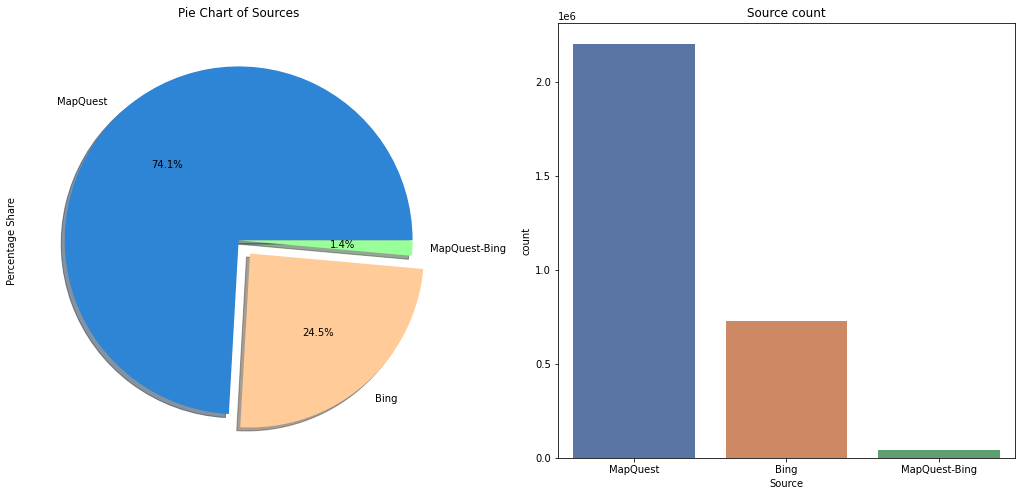

In [11]:
fig ,ax = plt.subplots(1,2,figsize=(18,8))
colors = ['#2e84d5', '#ffcc99', '#99ff99']
explode = [0, 0.1, 0]
df['Source'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0], colors= colors, explode=explode, shadow=True)
ax[0].set_title('Pie Chart of Sources')
ax[0].set_ylabel('Percentage Share')

sns.countplot(data=df, x = 'Source', ax=ax[1], order=df['Source'].value_counts().index, palette ='deep')
ax[1].set_title('Source count')
plt.show()

### Accidents per Timezone:
As we can observe below, we have information of accidents in four timezones. The most number of accidents have taken place in the Eastern timezone followed by Pacific. The actual count are as follows:
```
US/Eastern     1277187
US/Pacific      805117
US/Central      727147
US/Mountain     161721
Name: Timezone, dtype: int64
```

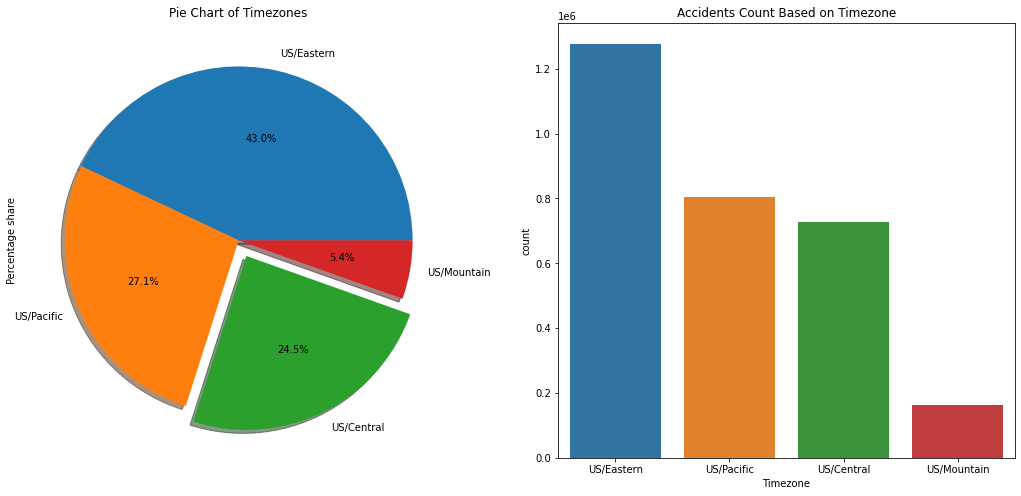

In [12]:
fig ,ax = plt.subplots(1,2,figsize=(18,8))
explode = [0, 0, 0.1, 0]
df['Timezone'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0], explode = explode, shadow = True)
ax[0].set_title('Pie Chart of Timezones')
ax[0].set_ylabel('Percentage share')

sns.countplot(data=df, x = 'Timezone', ax=ax[1],order=df['Timezone'].value_counts().index)
ax[1].set_title('Accidents Count Based on Timezone')
plt.show()

### Severity of Accidents:
Severity indicates the impact of the accident. Accidents with severity 3 and 4 
mostly involve fatalities and the ones with severity 2 involve having injuries.

As we can observe below, most of the accidents have severity of 2 which is average but there is none with severity 1, that means most of the accidents are average to extreme severe. The count for each severity are as follows:
```
2    1993410
3     887620
4      92337
1        968
Name: Severity, dtype: int64
```

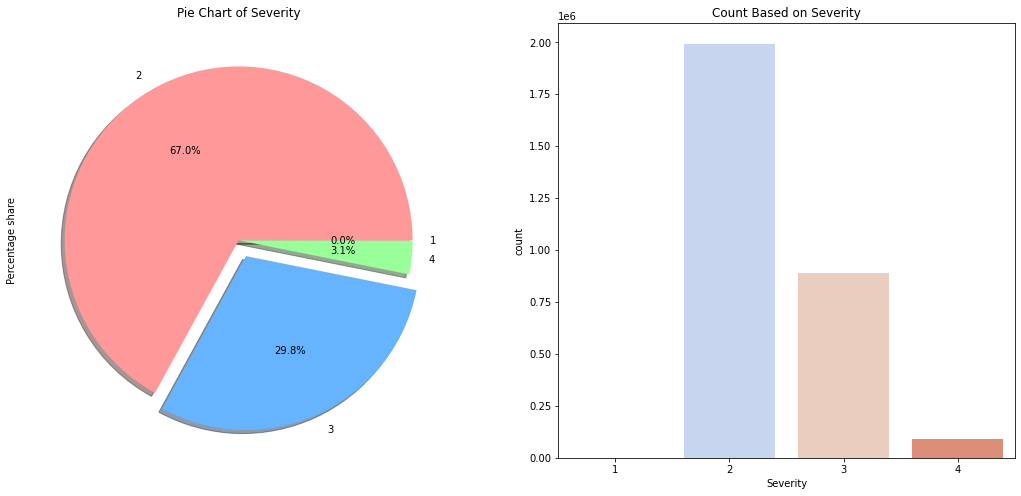

In [13]:
fig ,ax = plt.subplots(1,2,figsize=(18,8))
colors1 = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
explode = [0, 0.1, 0, 0]
df['Severity'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0], explode = explode, shadow = True, colors = colors1)
ax[0].set_title('Pie Chart of Severity')
ax[0].set_ylabel('Percentage share')

sns.countplot(data=df, x = 'Severity', ax=ax[1], palette ='coolwarm')
ax[1].set_title('Count Based on Severity')
plt.show()

Using the latitude and longitude coordinates given in the dataset, below are the plots for each severity on the USA map.

As we can observe from the below plots, most numbers of accidents occurred in the Eastern and Western part of the USA, which accounts for the fact that most numbers of accidents took place in regions with timezone: Eastern Standard Time and Pacific Standard Time.

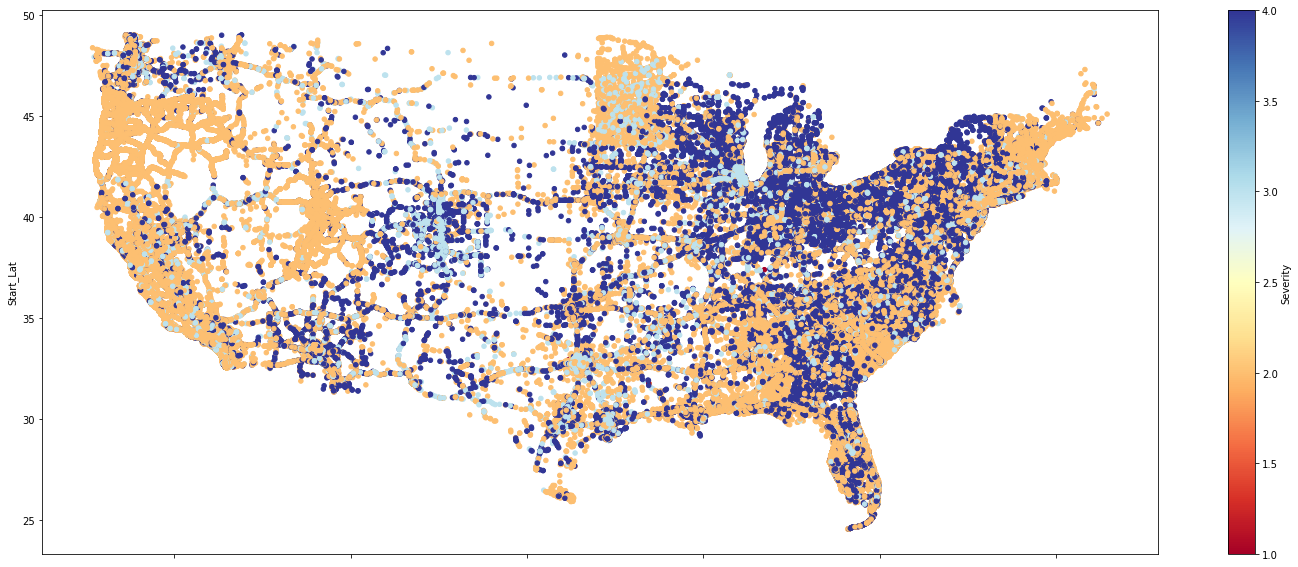

In [14]:
df.plot(kind='scatter', x='Start_Lng',y='Start_Lat',c='Severity',cmap='RdYlBu',colorbar=True,figsize=(25,10))
plt.show()


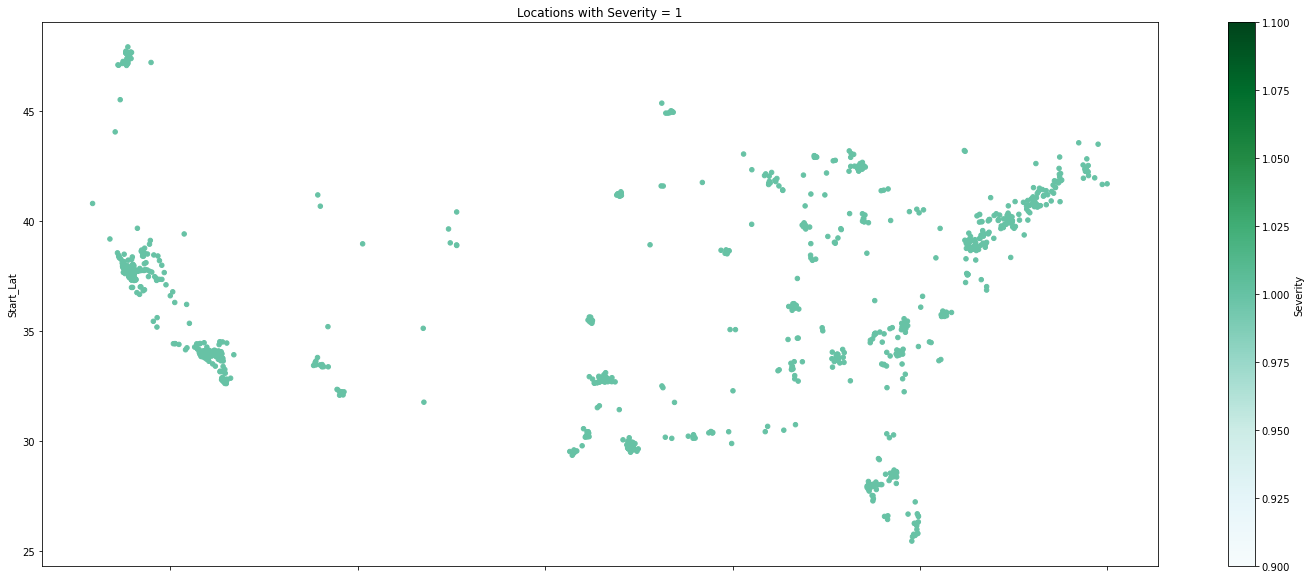

In [15]:
s1 = df[df.Severity == 1]
s1.plot(kind='scatter', x='Start_Lng',y='Start_Lat',c='Severity',cmap='BuGn',colorbar=True, figsize=(25,10))
plt.title('Locations with Severity = 1')
plt.show()

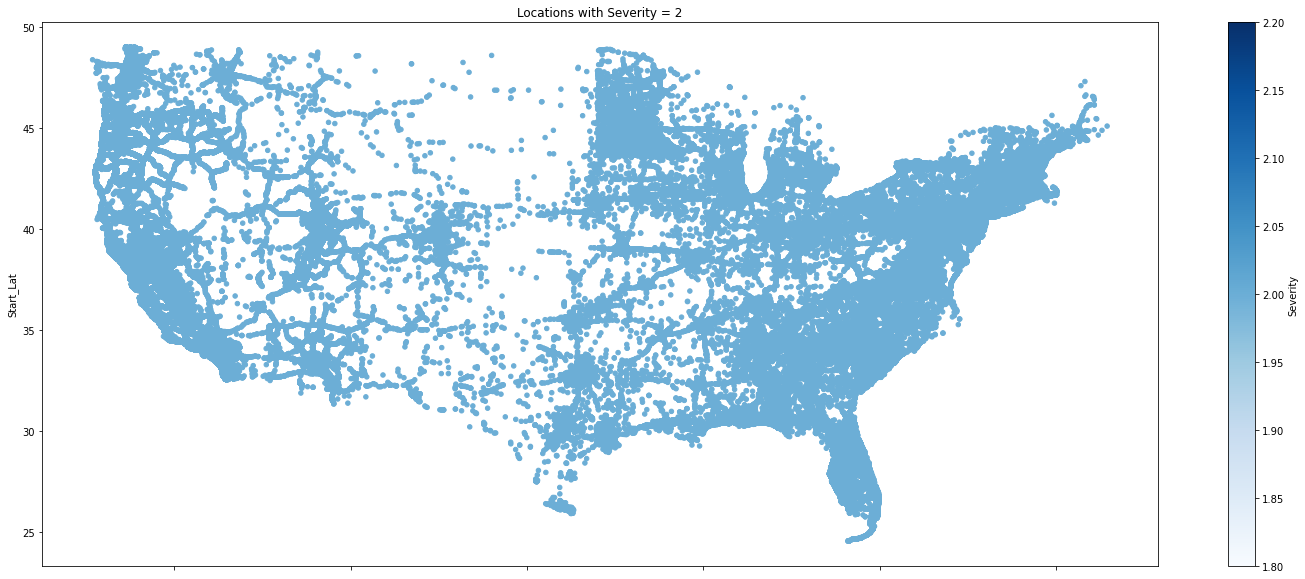

In [16]:
s1 = df[df.Severity == 2]
s1.plot(kind='scatter', x='Start_Lng',y='Start_Lat',c='Severity',cmap='Blues',colorbar=True, figsize=(25,10))
plt.title('Locations with Severity = 2')
plt.show()

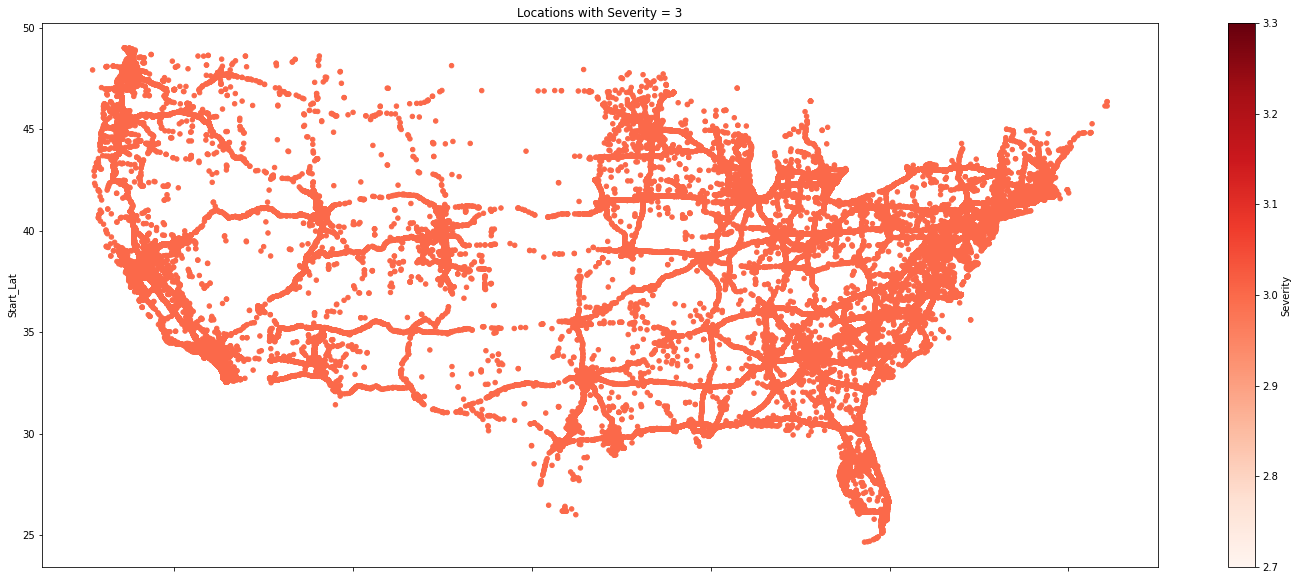

In [17]:
s1 = df[df.Severity == 3]
s1.plot(kind='scatter', x='Start_Lng',y='Start_Lat',c='Severity',cmap='Reds',colorbar=True, figsize=(25,10))
plt.title('Locations with Severity = 3')
plt.show()

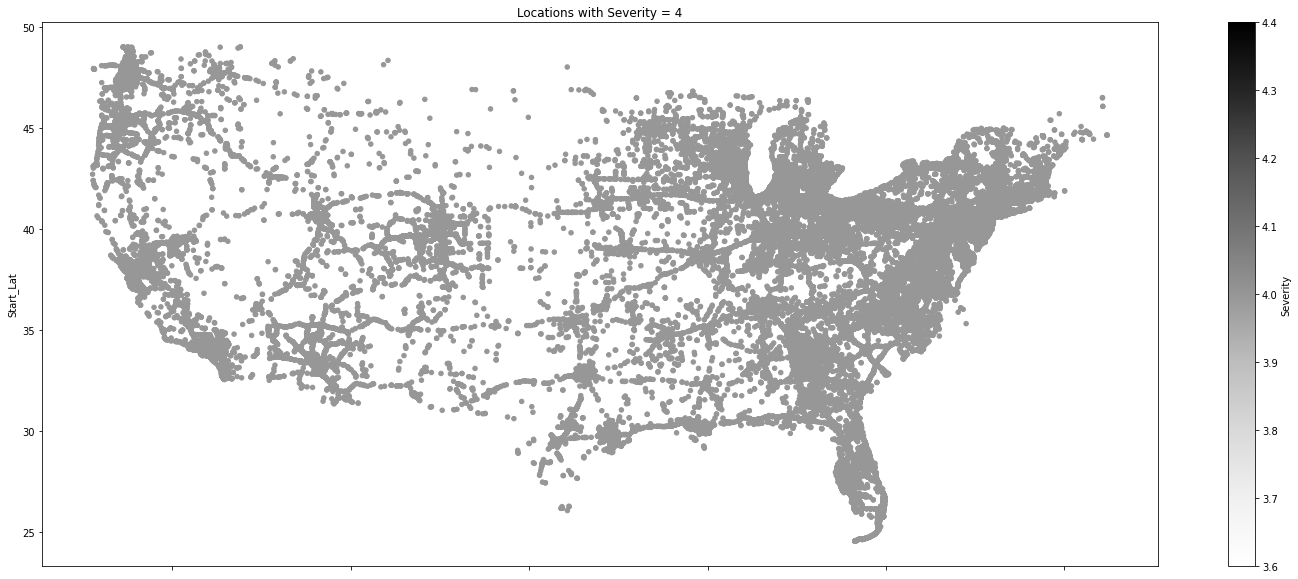

In [18]:
s1 = df[df.Severity == 4]
s1.plot(kind='scatter', x='Start_Lng',y='Start_Lat',c='Severity',cmap='Greys',colorbar=True, figsize=(25,10))
plt.title('Locations with Severity = 4')
plt.show()

### Number of Accidents by State:

The number of accidents for each state can be obtained by hovering over each state in the map below.

In [0]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

abbrev_us_state = dict(map(reversed, us_state_abbrev.items()))

In [8]:
accidents_by_state_df = df.groupby(['State'])['ID'].count().reset_index(name="No Of Accidents")
accidents_by_state_df = accidents_by_state_df.sort_values(['No Of Accidents'],ascending=False).reset_index(drop=True)

fig = go.Figure(data=go.Choropleth(
    locations=accidents_by_state_df['State'], 
    z = accidents_by_state_df['No Of Accidents'],
    locationmode = 'USA-states',
    colorscale = 'Reds',
    colorbar_title = "Number of Accidents",
))

fig.update_layout(
    title_text = 'State Accidents',
    geo_scope='usa', 
)

fig.show()

In [9]:
accidents_by_state_df['State Name'] = accidents_by_state_df['State'].map(abbrev_us_state)
accidents_by_state_df = accidents_by_state_df[['State Name', 'State','No Of Accidents']]
accidents_by_state_df[:10]

,State Name,State,No Of Accidents
0,California,CA,663204
1,Texas,TX,298062
2,Florida,FL,223746
3,South Carolina,SC,146689
4,North Carolina,NC,142460
5,New York,NY,137799
6,Pennsylvania,PA,90395
7,Michigan,MI,88694
8,Illinois,IL,86390
9,Georgia,GA,83620


#### High Accident Prone States
Below is the plot for the Top 10 States with most number of accidents. California has recorded the most numer of accidents with a considerable margin.

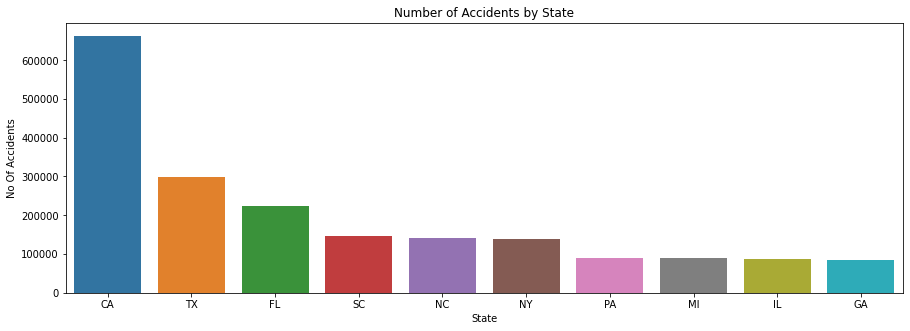

In [22]:
plt.figure(figsize=(15,10))
p = sns.barplot(y= accidents_by_state_df['No Of Accidents'], x='State', data=accidents_by_state_df[:10])
p.set_title("Number of Accidents by State")
plt.subplots_adjust(hspace = 0.5, top = 0.5)
plt.show()

### Average Severity By State:

As we can observe, average number of accidents in South Dakota have been sevre. Though California has recorded the highest number of accidents between the year 2016 and 2019, the average severity of accidents is 2.3.

In [14]:
State_Severity_df = df.groupby(['State']).agg({'Severity':'mean'}).sort_values('Severity',ascending=False).reset_index()
State_Severity_df['State Name'] = State_Severity_df['State'].map(abbrev_us_state)
State_Severity_df = State_Severity_df[['State Name', 'State','Severity']]
State_Severity_df[:10]

,State Name,State,Severity
0,South Dakota,SD,3.300000
1,Wyoming,WY,3.117886
2,North Dakota,ND,2.767442
3,Arkansas,AR,2.765580
4,Montana,MT,2.688492
5,Georgia,GA,2.664387
6,Maryland,MD,2.638063
7,Wisconsin,WI,2.631456
8,Iowa,IA,2.628165
9,Missouri,MO,2.619089


In [16]:
State_Severity_df.loc[State_Severity_df['State Name'] == 'California']

,State Name,State,Severity
35,California,CA,2.337331


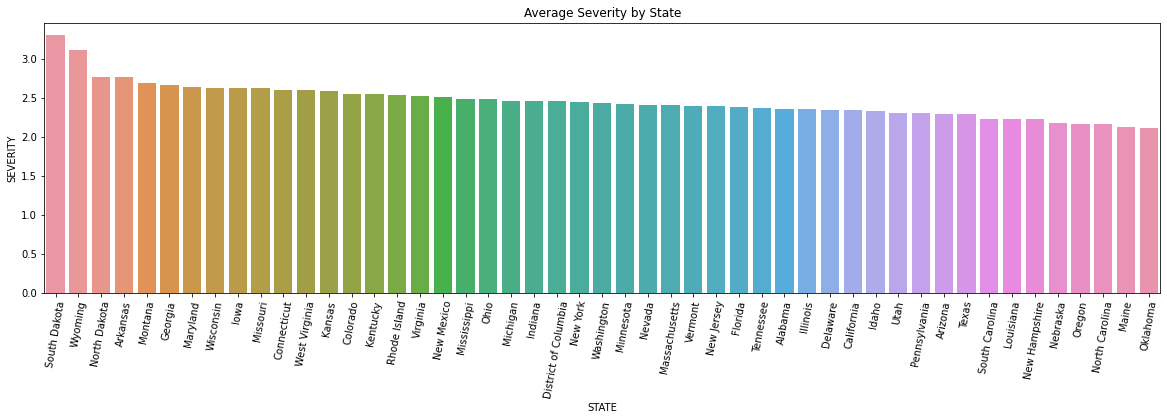

In [11]:
plt.figure(figsize=(20,10))
g = sns.barplot(y= State_Severity_df['Severity'], x='State Name', data=State_Severity_df)
g.set_title("Average Severity by State")
g.set(xlabel='STATE', ylabel='SEVERITY')
g.set_xticklabels(g.get_xticklabels(),rotation=80)
plt.subplots_adjust(hspace = 0.5, top = 0.5)
plt.show()

### Most Accident Causing Weather

As we can observe below,  36.2% of the accidents have occured when the weather is clear. Accidents occuring when the weather is cloudy makes sense. But the pie chart reveals that people drive carelessely when the weather is clear and carefully otherwise.

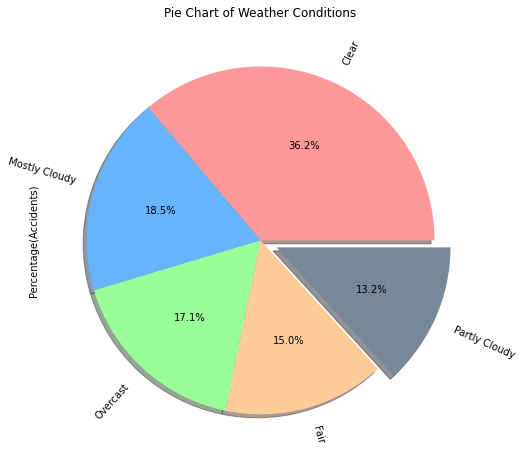

In [25]:
plt.figure(figsize=(18,8))
colors2 = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#778899']
w = df.groupby('Weather_Condition').size().sort_values(ascending =False).iloc[:5].plot.pie(explode=[0,0,0,0,0.1],autopct='%1.1f%%',colors=colors2,rotatelabels=True,shadow=True)
w.set_title('Pie Chart of Weather Conditions')
w.set_ylabel('Percentage(Accidents)')
plt.show()

### Most Accident Occuring Places:

As we can observe below, most of the accidents occur near the Traffic Signals followed by Junctions and Crossings.

Text(0, 0.5, ' ')

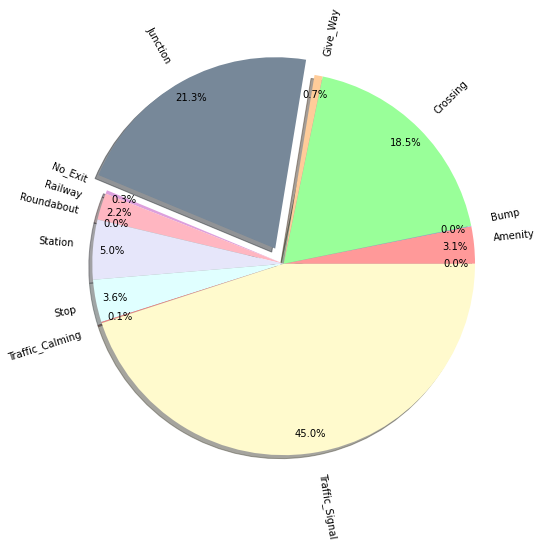

In [34]:
plt.figure(figsize=(18,8))
colors3 = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#778899','#DDA0DD','#FFB6C1','#F5FFFA','#E6E6FA','#E0FFFF','#F08080','#FFFACD']
places = [col for col in df.columns if df[col].dtype == np.dtype('bool')]
places_df = df[places]
places_count = places_df.sum(axis=0)
places_count.plot.pie(explode=[0,0,0,0,0.1,0,0,0,0,0,0,0,0],autopct='%1.1f%%',colors=colors3,rotatelabels=True,shadow=True,pctdistance=0.9, radius=1.1)
plt.ylabel(" ")

### Word Cloud

We will ananlyze the wordcloud for severity levels 2, 3 and 4. The number of accidents with severity level 1 are very less and we want to understand what the decription looks like for major severity level accidents.

In [57]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from collections import Counter

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
stop_words = set(stopwords.words('english')) 

In [0]:
severity_2 = df[df['Severity']==2]['Description']
description_2 = severity_2.str.split("(").str[0]
filtered_2 = [word for word in description_2 if word not in stop_words]
unique_string_2 = (" ").join(filtered_2)

severity_3 = df[df['Severity']==3]['Description']
description_3 = severity_3.str.split("!").str[0].value_counts().keys()
filtered_3 = [word for word in description_3 if word not in stop_words]
unique_string_3 = (" ").join(filtered_3)

severity_4 = df[df['Severity']==4]['Description']
description_4 = severity_4.str.split("!").str[0]
filtered_4 = [word for word in description_4 if word not in stop_words]
unique_string_4 = (" ").join(filtered_4)

In [0]:
wordcloud_2 = WordCloud(scale=7).generate(unique_string_2)
wordcloud_3 = WordCloud(scale=7, background_color="pink").generate(unique_string_3)
wordcloud_4 = WordCloud(scale=7, colormap="Oranges_r").generate(unique_string_4)

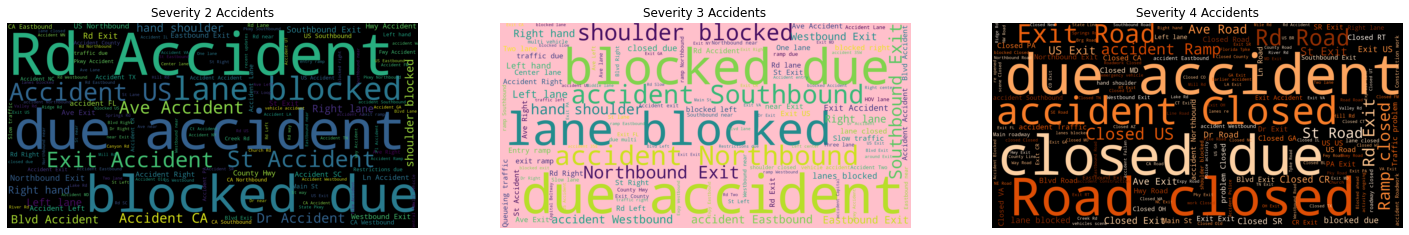

In [85]:
fig, axs = plt.subplots(1,3,sharey=True,figsize=(25,16))

axs[0].imshow(wordcloud_2,interpolation="bilinear")
axs[1].imshow(wordcloud_3,interpolation="bilinear")
axs[2].imshow(wordcloud_4,interpolation="bilinear")

axs[0].axis("off")
axs[1].axis("off")
axs[2].axis("off")

axs[0].set_title('Severity 2 Accidents')
axs[1].set_title('Severity 3 Accidents')
axs[2].set_title('Severity 4 Accidents')

plt.show()

As we can observe, severity level 2 & 3 have somewhat same impact mostly leading to blocked lanes whereas severity 4 level accdidents mostly leads to the closure of the road.

# Data Cleaning and Pre-Processing

### Looking at the percentage and the total number of values that are missing for every attribute that has missing values.

In [5]:
missing = df.isnull().sum().sort_values(ascending=False)
percent_missing = ((missing/df.isnull().count())*100).sort_values(ascending=False)
missing_df = pd.concat([missing,percent_missing,df[missing.index].dtypes], axis=1, keys=['Total', 'Percent','Data Types'],sort=False)
missing_df[missing_df['Total']>=1]

,Total,Percent,Data Types
End_Lat,2246264,75.521554,float64
End_Lng,2246264,75.521554,float64
Precipitation(in),1998358,67.186716,float64
Number,1917605,64.471722,float64
Wind_Chill(F),1852623,62.286965,float64
TMC,728071,24.478446,float64
Wind_Speed(mph),440840,14.821464,float64
Weather_Condition,65932,2.216697,object
Visibility(mi),65691,2.208595,float64
Humidity(%),59173,1.989453,float64


### Treating Missing Values:

As we can observe below, we have a lot of missing values in our dataset. Now, we will look at every feature and analyze what to do with it's missing values.



1.  For attributes related to weather which are Humidity, Precipitation,  Wind_Chill, Wind_Speed(mph), Visibility, Temperature, Pressure, I have replaced NaN's with the mean of that attribute in a particular State.


2.  For attributes with data type as Object which are Weather Condition, Wind Direction, Sunrise Sunset, Civil Twilight, Astronomical Twilight, I have replaced NaN's with it's Mode.

3. For attributes like Airport Code, Timezone and City; it makes sense to replace it with the most occuring value in it's State.

4. A traffic accident may have a Traffic Message Channel (TMC) code which provides more detailed description of the event. 
```
	TMC	  counts
	201.0	1890037
	241.0	219071
	245.0	35919
	229.0	22653
	203.0	16792
	222.0	12552
	244.0	11163
	406.0	9467
	246.0	6350
	202.0	6047
    343.0	5827
    247.0	4616
	236.0	2116
	206.0	1157
	248.0	1012
	339.0	774
	341.0	504
	336.0	81
	200.0	66
	239.0	54
	351.0	6
```

  201: indicating [(Q) accident(s)] occurs the most number of times. So we will fill the NaN's with 201.




In [0]:
list = ['Humidity(%)','Precipitation(in)','Wind_Chill(F)','Wind_Speed(mph)','Visibility(mi)','Temperature(F)','Pressure(in)']
for value in list:
    df[value]=df.groupby('State')[value].apply(lambda x:x.fillna(x.mean()))

In [7]:
missing_columns = missing_df[missing_df['Total']>=1]
object_columns = missing_columns[missing_columns['Data Types']=='object'].index
object_columns

Index(['Weather_Condition', 'Wind_Direction', 'Weather_Timestamp',
       'Airport_Code', 'Timezone', 'Zipcode', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Civil_Twilight', 'Sunrise_Sunset', 'City',
       'Description'],
      dtype='object')

In [0]:
median_impute = ['Weather_Condition','Wind_Direction','Sunrise_Sunset','Civil_Twilight','Astronomical_Twilight',]
for col in median_impute:
    df[col].fillna(df[col].mode()[0],inplace=True)

In [0]:
df['City'] = df.groupby('State')['City'].transform(lambda x: x.fillna(x.value_counts().index[0]))
df['Timezone'] = df.groupby('State')['Timezone'].transform(lambda x: x.fillna(x.value_counts().index[0]))
df['Airport_Code'] = df.groupby('State')['Airport_Code'].transform(lambda x: x.fillna(x.value_counts().index[0]))
df['Zipcode'] = df.groupby('State')['Zipcode'].transform(lambda x: x.fillna(x.value_counts().index[0]))

In [10]:
new_df = df['TMC'].value_counts().rename_axis('TMC').reset_index(name='counts')
new_df[:5]

,TMC,counts
0,201.0,1890037
1,241.0,219071
2,245.0,35919
3,229.0,22653
4,203.0,16792


In [0]:
df['TMC'] = df['TMC'].fillna(201.0)


In [0]:
# def getZipcode(row):
#   lat = row['Start_Lat']
#   lon = row['Start_Lng']
#   add = geocoder.mapquest([lat, lon], method = 'reverse', key = 'WvXGDrf0OdtALelh78LrXDx5ij70VxaW')
#   return add.postal

# missing_zipcode = df[df['Zipcode'].isnull()].index.tolist()
# for index in missing_zipcode:
#     df['Zipcode'] = getZipcode(df.iloc[index])

###  Deleting Unneccesary Features:

1. Drop duplicate rows

2. As we can observe below, the feature Country contains only one entry — USA, since we are dealing with the USA’s dataset. The feature Turning_Loop also contains one value — False. This means that there was no turning loop in the vicinity of any of the accidents. Since the above mentioned features contain only one value, we will drop them.

3. End Latitude and End Longitude states the latitude and longitude where the accident ended. If the accident affected a huge aread of road, it will be difficult to impute them. Although, we could set their values the same as Start_lat and Start_lng, but that'll be the same as removing them since about 76% of data in the columns would be the same. Hence dropping them makes sense.

4. Weather Timestamp column records the time the weather was taken, hence we will drop it.

5. Nautical Twilight shows the period of day (i.e. day or night) based
on nautical twilight. We will drop it too.

6.  Number shows the street number in address field. We could either impute it by filling it with the common street number within the state and city or we could fill the NaN's with 0 considering all the accidents may not occur on a street. Since about 65% of it's values are missing, and it would not affect our model, we will drop number as well.

7. We do need the description feature for our model, so we will drop it.

In [12]:
for col in df.columns:
    if len(df[col].unique()) == 1:
        print(col)

Country
Turning_Loop


In [0]:
df = df.drop_duplicates()
df = df.drop(['Country', 'Turning_Loop', 'End_Lat', 'End_Lng', 'Weather_Timestamp', 'Nautical_Twilight', 'Number', 'Description'], axis=1)

Once again we will check if we have any missing values and as we can observe below, we don't have any attribute with missing values anymore

In [14]:
missing = df.isnull().sum().sort_values(ascending=False)
percent_missing = ((missing/df.isnull().count())*100).sort_values(ascending=False)
missing_df = pd.concat([missing,percent_missing], axis=1, keys=['Total', 'Percent'],sort=False)
missing_df[missing_df['Total']>=1]

,Total,Percent


In [15]:
df = df.dropna()
df.shape[0]

2974335

### Standardizing numerical data. 

We will leave categorical features and features with boolean values as it is.

In [16]:
df.dtypes

ID                        object
Source                    object
TMC                      float64
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
Distance(mi)             float64
Street                    object
Side                      object
City                      object
County                    object
State                     object
Zipcode                   object
Timezone                  object
Airport_Code              object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitation(in)        float64
Weather_Condition         object
Amenity                     bool
Bump                        bool
Crossing                    bool
Give_Way                    bool
Junction  

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# getting numeric data
num_d = df.select_dtypes(include=['float64'])
num_d.columns

# updating the columns with their normalized values
df[num_d.columns] = sc.fit_transform(num_d)

# Feature Engineering

### Converting Start_Time to Datetype and extracting Year, Month, Week, Day, Hour and adding Time Duration
1. Converting Start_Time and End_Time to datetypes.

2. Extracting Year, Month, Week, Day, Hour from the Start Time

3. Computing the amount of time in the unit of minutes for each accident, rounding to the nearest integer.

In [0]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df['End_Time'] = pd.to_datetime(df['End_Time'], errors='coerce')

df['Year'] = df['Start_Time'].dt.year
df['Month'] = df['Start_Time'].dt.strftime('%b')
df['WeekDay'] = df['Start_Time'].dt.day_name()
df['Day'] = df['Start_Time'].dt.day
df['Hour'] = df['Start_Time'].dt.hour
df['Count'] = 1

df['Time_Duration(min)'] = round((df['End_Time']-df['Start_Time'])/np.timedelta64(1,'m'))


In [19]:
df['Time_Duration(min)'][df['Time_Duration(min)']<=0]

69719      -0.0
69720      -0.0
69721      -0.0
69722      -1.0
69723      -1.0
309387    -30.0
309388    -30.0
628436    -12.0
628472    -31.0
628489     -0.0
628923    -14.0
628942     -0.0
628943    -30.0
1265261   -30.0
1265262   -31.0
2002026   -30.0
2002111   -30.0
2002112   -31.0
2565229   -34.0
2565705    -7.0
2565708    -7.0
2693474   -31.0
Name: Time_Duration(min), dtype: float64

#### We will drop the rows with negative time duration.

In [0]:
neg_outliers = df['Time_Duration(min)']<=0
df[neg_outliers] = np.nan
df.dropna(subset=['Time_Duration(min)'],axis=0,inplace=True)

In [21]:
df['Time_Duration(min)'][df['Time_Duration(min)']<=0]

Series([], Name: Time_Duration(min), dtype: float64)

#### Deal with large values of Time Duration:
df['Time_Duration(min)'].max()

1786320.0

If the time duration is greater than n * standard_deviation, we will replace those with the median values.

In [0]:
n=3
median = df['Time_Duration(min)'].median()
std = df['Time_Duration(min)'].std()
outliers = (df['Time_Duration(min)'] - median).abs() > std*n
df[outliers] = np.nan
df['Time_Duration(min)'].fillna(median, inplace=True)

In [23]:
df['Time_Duration(min)'].max()

11080.0

### Trend of Accidents by Month
Accident rates peak in the last quarter of the year.

Text(0.5, 1.0, 'Count of Monthly Accident')

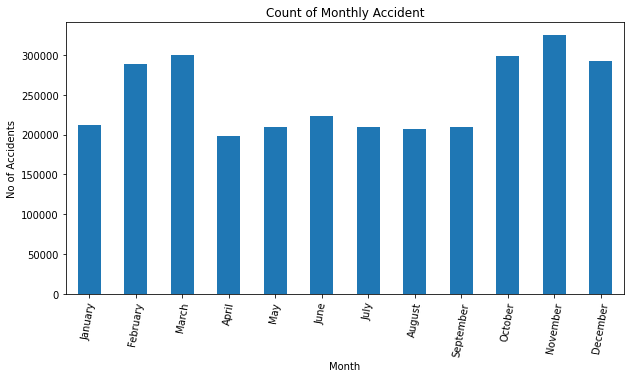

In [43]:
plt.figure(figsize=(10,5))
df.groupby('Month')['Count'].value_counts().plot(kind='bar')
plt.xticks(np.arange(12),calendar.month_name[1:13],rotation=80)
plt.xlabel('Month')
plt.ylabel('No of Accidents')
plt.title('Count of Monthly Accident')

### Trend of Accidents by Day

There are a large number of accidents during weekdays
(Monday to Friday). On the contrary, there are relatively fewer accidents on
weekends (Saturday and Sunday)

Text(0.5, 1.0, 'Accident Count by Day')

<Figure size 1080x720 with 0 Axes>

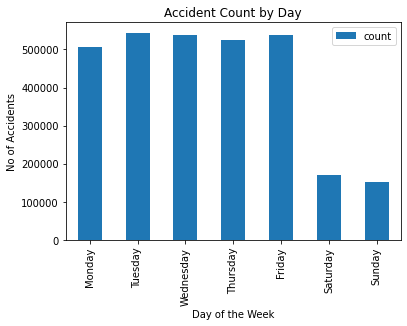

In [45]:
plt.figure(figsize=(15,10))
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
temp = df.groupby('WeekDay').agg(['count'])['ID']
temp.loc[day_order].plot(kind = 'bar')
plt.xlabel('Day of the Week')
plt.ylabel('No of Accidents')
plt.title('Accident Count by Day')

### Dropping all non numeric columns and unimportant columns

The below two distribution plot indicate that Wind speed and Precipitation are not very important features in determining the severity of the accident as most of the rows have the same value.

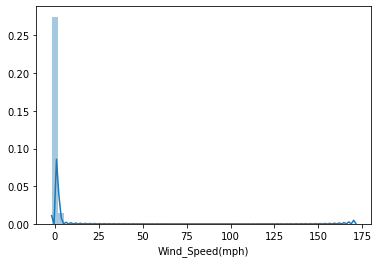

In [46]:
sns.distplot(df['Wind_Speed(mph)'])

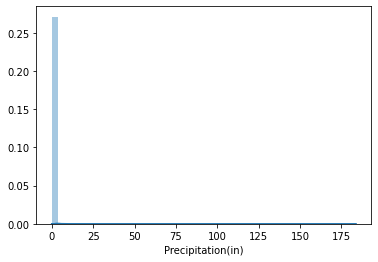

In [38]:
sns.distplot(df['Precipitation(in)'])

In [0]:
df = df.drop(labels = ['Airport_Code', 'Astronomical_Twilight', 'Civil_Twilight', 'End_Time', 
                                             'ID', 'Month', 'Start_Time', 'Street', 
                                             'Zipcode','Year','Count','Wind_Speed(mph)','Precipitation(in)'], axis = 1)

### Finding the Categorical Columns

In [25]:
cols = df.columns
num_cols = df._get_numeric_data().columns
cat_cols = set(cols) - set(num_cols)
cat_cols

{'City',
 'County',
 'Side',
 'Source',
 'State',
 'Sunrise_Sunset',
 'Timezone',
 'Weather_Condition',
 'WeekDay',
 'Wind_Direction'}

Since the dataset is very large and my session kept crashing while dealing with categorical features, we will select a state of interest and do our analysis.

I initially tried all the rows that had state Caifornia(most number of accidents recorded) and Pennsylvania but the system kept crashing, and tried a bunch of other high accident recorded state. For now, we have chosen Pennsylvania.

In [0]:
# df_state = df.loc[df['State'].isin(['PA', 'CA'])].copy()
# Selecting the state of Pennsylvania
state='PA'
df_state = df.loc[df.State==state].copy()
df_state.drop('State',axis=1, inplace=True)

In [0]:
df_state = pd.get_dummies(df_state, columns = ['City',  'County', 'Side', 'Source', 'Sunrise_Sunset', 'Timezone', 'Weather_Condition', 'WeekDay', 'Wind_Direction'],
                                              prefix = ['City', 'County', 'Side', 'Source', 'Sunrise_Sunset', 'Timezone', 'Weather_Condition', 'WeekDay', 'Wind_Direction'])

# Machine Learning

### Splitting Data into Train and Test 

In [0]:
ml_df = df_state
target='Severity'
y = ml_df[target]
X = ml_df.drop(target, axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)
accuracy_list=[]

We will run two different models on the data. We have a Multiclass Classification problem. We have both categorical as well as numerical features. We will use random forest and K-nearest neighbor, since these algorithm works well when you have both categorical and numerical features.

K-Nearest Neighbors

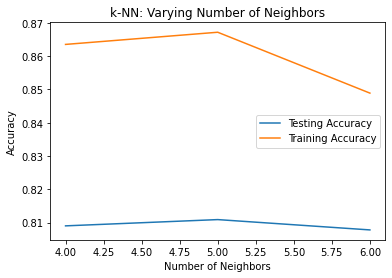

In [46]:
neighbors = np.arange(4, 7)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, neighbor in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors = neighbor)
    knn.fit(X_train,y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)


plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [30]:
knn_1 = KNeighborsClassifier(n_neighbors=6)

knn_1.fit(X_train,y_train)

y_predicted = knn_1.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_predicted)
accuracy_list.append(accuracy_knn)

print('Accuracy for K-Nearest Neighbors (KNN): {:.3f}%.'.format(accuracy_knn*100))

Accuracy for K-Nearest Neighbors (KNN): 80.781%.


### Random Forest

In [0]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)
y_predicted = rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_predicted)
accuracy_list.append(accuracy_rf)

In [44]:
print("Accuracy for Randon forest algorithm: {:.3f}%.".format(accuracy_rf*100))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test,y_predicted))
print("\nClassification Report:")
print(classification_report(y_test,y_predicted))

Accuracy for Randon forest algorithm: 91.132%.

Confusion Matrix:
[[    0     7     1     0]
 [    0 12993   442   119]
 [    0   773  2775    24]
 [    0   215    22   705]]

Classification Report:
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         8
         2.0       0.93      0.96      0.94     13554
         3.0       0.86      0.78      0.81      3572
         4.0       0.83      0.75      0.79       942

    accuracy                           0.91     18076
   macro avg       0.65      0.62      0.64     18076
weighted avg       0.91      0.91      0.91     18076



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



#### Evaluating the 15 most important features

No handles with labels found to put in legend.


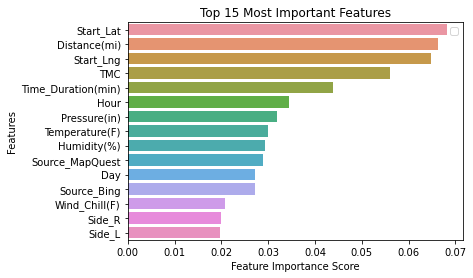

In [36]:
imp_feature = pd.Series(rf.feature_importances_,index=X.columns).sort_values(ascending=False)

sns.barplot(x=imp_feature[:15], y=imp_feature.index[:15])
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Top 15 Most Important Features")
plt.legend()
plt.show()

In [45]:
imp_feature.sort_values(ascending=False)[:15]

Start_Lat             0.068120
Distance(mi)          0.066361
Start_Lng             0.064903
TMC                   0.056005
Time_Duration(min)    0.043903
Hour                  0.034480
Pressure(in)          0.031829
Temperature(F)        0.029962
Humidity(%)           0.029415
Source_MapQuest       0.028866
Day                   0.027150
Source_Bing           0.027095
Wind_Chill(F)         0.020889
Side_R                0.019861
Side_L                0.019729
dtype: float64

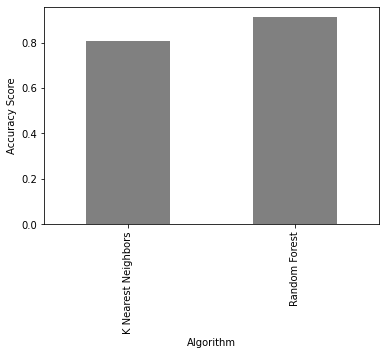

In [63]:
algorithm_list = ['K Nearest Neighbors', 'Random Forest']
y_ticks = np.arange(len(algorithm_list))

df_accuracy = pd.DataFrame(zip(algorithm_list, accuracy_list), columns=['Algorithm','Accuracy']).sort_values(by=['Accuracy'],ascending = True)
ax = df_accuracy.plot.bar('Algorithm', 'Accuracy', align='center',legend=False,color='0.5')
plt.ylabel('Accuracy Score')
plt.show()

As we can observe, Random Forest performs better than KNN because of curse of dimensionality. We filtered the rows that has state as pennsylvania and we have a large number of features. KNN performs better with a lower number of features than a large number of features. When the number of features increases than it requires more data because increase in the number of features also leads to the problem of overfitting. To avoid overfitting, the required data will need to grow exponentially as you increase the number of features.

# Future Work

1. First and most importantly, we can upload the data on AWS and instance and use distributed ML to run our model on the entire dataset.

2. To deal with the problem of curse of dimensionality, we can first perform Principal Component Analysis and then apply K nearest neighbor algorithm.